# Build a Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve generalization and reduce overfitting.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset is based on:
Binary classification

Mixed feature types

Non-linear patterns

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/churn_prediction_data/churn-bigml-20.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/CODVEDA_TECH_LC/dataset_for_task/churn_prediction_data/churn-bigml-80.csv")
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)
test_df  = pd.get_dummies(test_df, drop_first=True)

train_df, test_df = train_df.align(test_df, axis=1, fill_value=0)

In [ ]:
target_col = "Churn"

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8942235558889723


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[2265   13]
 [ 269  119]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94      2278
        True       0.90      0.31      0.46       388

    accuracy                           0.89      2666
   macro avg       0.90      0.65      0.70      2666
weighted avg       0.89      0.89      0.87      2666



In [ ]:
cv_scores = cross_val_score(
    rf, X_train, y_train,
    cv=5,
    scoring="f1"
)

print("F1-score promedio:", cv_scores.mean())

F1-score promedio: 0.482530987253626


In [ ]:
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

importances.head(10)

,Feature,Importance
3,Total day minutes,0.131292
5,Total day charge,0.128316
15,Customer service calls,0.093681
6,Total eve minutes,0.068940
8,Total eve charge,0.067495
12,Total intl minutes,0.040798
4,Total day calls,0.038940
0,Account length,0.038865
14,Total intl charge,0.038782
7,Total eve calls,0.035668


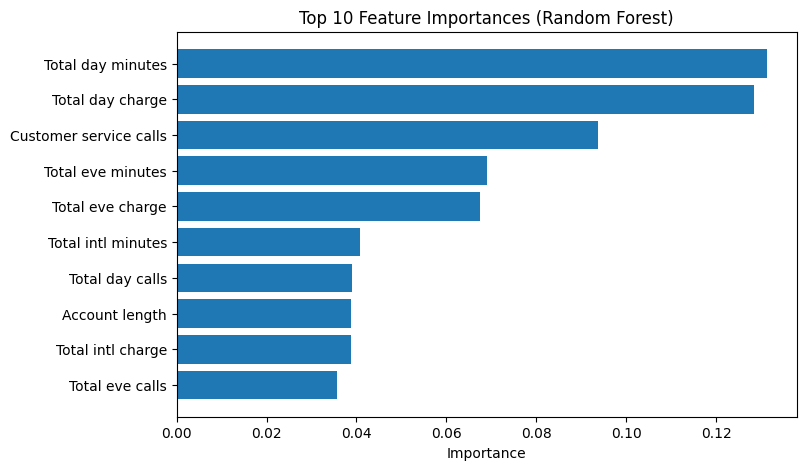

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(importances["Feature"][:10], importances["Importance"][:10])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

Figure shows the Top 10 Feature Importances obtained from the trained Random Forest classifier.

Feature importance in Random Forest measures how much each variable contributes to reducing impurity (e.g., Gini impurity) across all trees in the ensemble.
Features with higher importance values have a greater influence on the final prediction.

Each bar represents the relative contribution of a feature to the model’s decision-making process.